In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [21]:
def bsm_mcs_valuation(strike):
     ''' Dynamic Black-Scholes-Merton Monte Carlo estimator
 for European calls.
 Parameters
 ==========
 strike : float
 strike price of the option
 Results
 =======
 value : float
 estimate for present value of call option
 '''
     S0 = 179.80; T = 126.53; r = 0.05; vola = 0.24;
     M = 100; I = 20000
     dt = T / M
     rand = np.random.standard_normal((M + 1, I))
     S = np.zeros((M + 1, I)); S[0] = S0
     for t in range(1, M + 1):
         S[t] = S[t-1] * np.exp((r - 0.5 * vola ** 2) * dt+ vola * np.sqrt(dt) * rand[t])
     value = (np.exp(-r * T) 
                     * np.sum(np.maximum(S[-1] - strike, 0)) / I)
     return value

In [22]:
def seq_value(n):
     ''' Sequential option valuation.
 Parameters
 ==========
 n : int
 number of option valuations/strikes
 '''
     strikes = np.linspace(80, 120, n)
     option_values = []
     for strike in strikes:
      option_values.append(bsm_mcs_valuation(strike))
     return strikes, option_values

In [25]:
 n = 100 # number of options to be valued
 %time strikes, option_values_seq = seq_value(n)

CPU times: total: 5.34 s
Wall time: 5.58 s


Text(0, 0.5, 'European call option values')

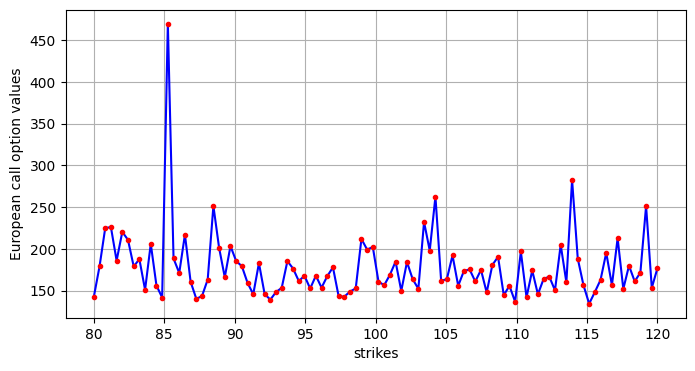

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(strikes, option_values_seq, 'b')
plt.plot(strikes, option_values_seq, 'r.')
plt.grid(True)
plt.xlabel('strikes')
plt.ylabel('European call option values')